In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

sys.path.append('../')
from utils import *

# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 14  # Axis labels
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick labels
plt.rcParams['font.size'] = 14  # General font size

In [3]:
df_clima = pd.read_csv('../data/clima.csv.gz')

df_clima.date = pd.to_datetime(df_clima.date)

df_clima.head()

,uf,date,temp_med,rel_humid_med,precip_tot
0,AC,2009-12-27,27.037005,79.269618,13.6760
1,AC,2010-01-03,26.798732,81.411373,35.3394
2,AC,2010-01-10,25.551209,86.865195,49.3627
3,AC,2010-01-17,25.989073,87.338609,56.2562
4,AC,2010-01-24,25.825559,89.055595,77.6665


In [4]:
df_preds, models_by_state, data_all = load_preds(exclude = False)


In [5]:
def plot_series(ax, data_all, state, legend = True): 
    data_ = data_all.loc[data_all.uf == state]
    
    ax.plot(data_.date,data_.casos,color = 'black')
    ax.grid()
    
    ax.set_ylabel('New cases')
    '''
    ax.hlines(y=28000, xmin=pd.to_datetime('2010-01-01'), xmax= pd.to_datetime(Week(2022, 25).startdate()), color='tab:blue', linewidth=2, label = 'Train - 1')
    
    ax.vlines(x=pd.to_datetime('2010-01-01'), ymin=23000, ymax=28000, color='tab:blue', linewidth=2)
    ax.vlines(x=pd.to_datetime(Week(2022, 25).startdate()), ymin=23000, ymax=28000, color='tab:blue', linewidth=2)
    
    ax.hlines(y=35000, xmin=pd.to_datetime('2010-01-01'), xmax= pd.to_datetime(Week(2023, 25).startdate()), color='tab:green', linewidth=2, label = 'Train - 2')
    
    ax.vlines(x=pd.to_datetime('2010-01-01'), ymin=30000, ymax=35000, color='tab:green', linewidth=2)
    ax.vlines(x=pd.to_datetime(Week(2023, 25).startdate()), ymin=30000, ymax=35000, color='tab:green', linewidth=2)
    '''
        
    ax.axvspan(
            pd.to_datetime(Week(2022, 41).startdate()),
            pd.to_datetime(Week(2023, 40).startdate()),
            color="tab:blue",
            alpha=0.2,  # Adjust transparency
            label=f"Test - 1"
    )
    
    ax.axvspan(
            pd.to_datetime(Week(2023, 41).startdate()),
            pd.to_datetime(Week(2024, 40).startdate()),
            color="tab:green",
            alpha=0.2,  # Adjust transparency
            label=f"Test - 2"
    )

    if legend: 
        ax.legend()
    
    ax.set_title(state)

In [6]:
def plot_clima(ax,df_clima, state):

    df_clima_ = df_clima.loc[df_clima.uf == state]

    ax.plot(df_clima_.date, df_clima_.temp_med, color = 'tab:orange')

    ax.grid()

    ax.set_ylabel('Average temperature')
    
    ax.set_title(state)

In [7]:
def plot_series_clima(ax, data_all, df_clima, state, legend = True): 
    data_ = data_all.loc[data_all.uf == state]
    
    ax.plot(data_.date,data_.casos,color = 'black',zorder=2)
    
    ax.set_ylabel('New probable cases')

    max_c = data_.casos.max()

    ax.axvline(pd.to_datetime(Week(2022, 25).startdate()), color = 'tab:blue', ls = '--', label = 'End train - 1')
    ax.axvline(pd.to_datetime(Week(2023, 25).startdate()), color = 'tab:green', ls = '--', label = 'End train - 2')

    #m1 = 0.2*max_c
    
    #ax.hlines(y=m1+ 0.1*max_c, xmin=pd.to_datetime('2010-01-01'), xmax= pd.to_datetime(Week(2022, 25).startdate()), color='tab:blue', linewidth=2, label = 'Train - 1', zorder = 1)
    
    #ax.vlines(x=pd.to_datetime('2010-01-01'), ymin=m1, ymax=m1 + 0.1*max_c, color='tab:blue', linewidth=2, zorder = 1)
    #ax.vlines(x=pd.to_datetime(Week(2022, 25).startdate()), ymin=m1, ymax=m1 + 0.1*max_c, color='tab:blue', linewidth=2, zorder = 1)
    
    #ax.hlines(y=35000, xmin=pd.to_datetime('2010-01-01'), xmax= pd.to_datetime(Week(2023, 25).startdate()), color='tab:green', linewidth=2, label = 'Train - 2')
    
    #ax.vlines(x=pd.to_datetime('2010-01-01'), ymin=30000, ymax=35000, color='tab:green', linewidth=2)
    #ax.vlines(x=pd.to_datetime(Week(2023, 25).startdate()), ymin=30000, ymax=35000, color='tab:green', linewidth=2)
    
        
    ax.axvspan(
            pd.to_datetime(Week(2022, 41).startdate()),
            pd.to_datetime(Week(2023, 40).startdate()),
            color="tab:blue",
            alpha=0.2,  # Adjust transparency
            label=f"Test - 1"
    )
    
    ax.axvspan(
            pd.to_datetime(Week(2023, 41).startdate()),
            pd.to_datetime(Week(2024, 40).startdate()),
            color="tab:green",
            alpha=0.2,  # Adjust transparency
            label=f"Test - 2"
    )

    if legend: 
        ax.legend(loc=(-0.6, 0.65))
    
    ax.set_title(state)

    ax2 = ax.twinx()

    df_clima_ = df_clima.loc[df_clima.uf == state]

    ax2.plot(df_clima_.date, df_clima_.temp_med, color = 'tab:orange', zorder=1, alpha =.5) 

    ax2.set_ylabel('Average temperature', color = 'tab:orange')

    ax2.set_ylim([10, 30])

    ax.grid()
    

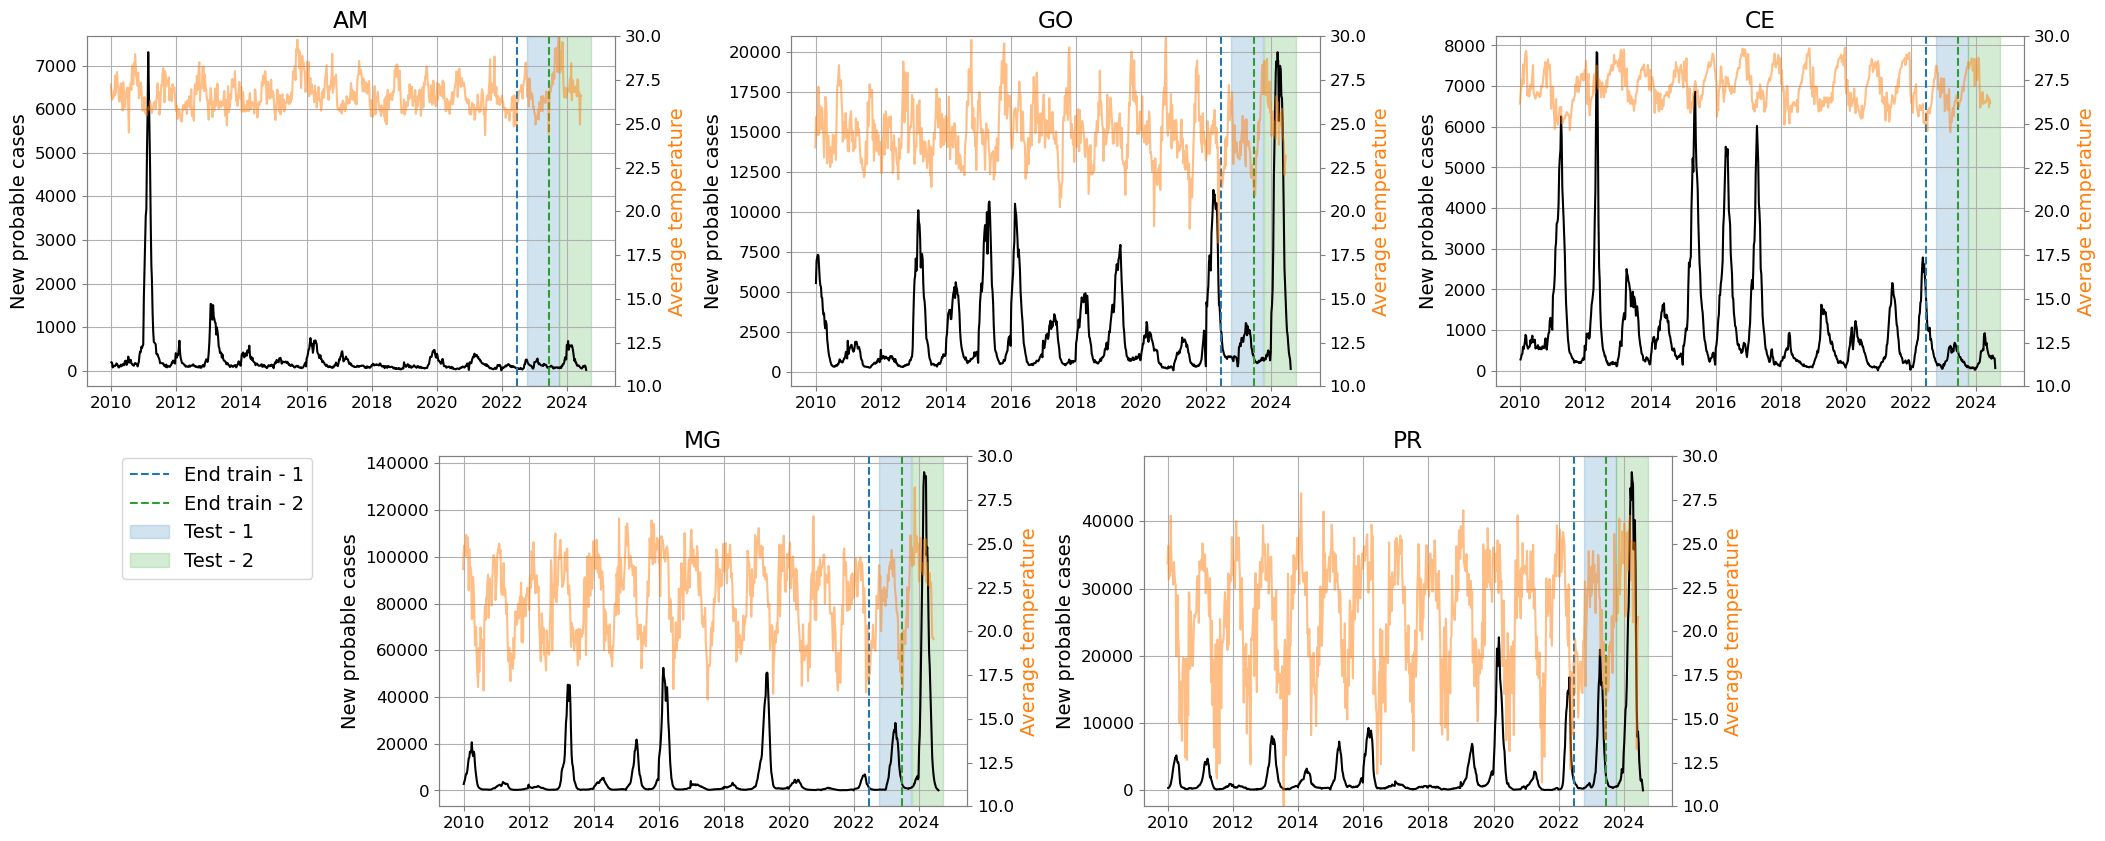

In [8]:
fig = plt.figure(figsize=(25, 10))
gs = gridspec.GridSpec(2, 6, figure=fig)
    
# First row with three boxplots
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
    
# Second row with two boxplots
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])


plot_series_clima(ax1, data_all, df_clima, 'AM', False)

plot_series_clima(ax2, data_all, df_clima, 'GO', False)

plot_series_clima(ax3, data_all, df_clima, 'CE', False)

plot_series_clima(ax4, data_all, df_clima, 'MG', True)

plot_series_clima(ax5, data_all, df_clima, 'PR', False)

plt.subplots_adjust(wspace= 1)

plt.savefig(f'../figures/fig1_sprint.pdf', bbox_inches = 'tight')

In [9]:
df_for_base = pd.read_csv('../predictions/ensemble_2025_E1_mandatory.csv')

df_for_base.date = pd.to_datetime(df_for_base.date)

df_for_base = df_for_base.sort_values(by ='date')

df_for_base.head()

,pred,lower,upper,date,state
33,86.449485,20.384674,443.303836,2024-10-06,AM
191,3589.327791,160.585718,6071.450305,2024-10-06,MG
104,1259.290115,337.580001,4713.947859,2024-10-06,GO
253,2662.260254,187.364429,14262.916893,2024-10-06,PR
101,93.377047,51.615362,1424.225735,2024-10-06,CE


In [10]:
df_for = pd.read_csv('../predictions/ensemble_2025_E2.csv')

df_for.date = pd.to_datetime(df_for.date)

df_for = df_for.sort_values(by ='date')

df_for.head()

,pred_ensemble_23,lower_ensemble_23,upper_ensemble_23,date,pred_ensemble_24,lower_ensemble_24,upper_ensemble_24,state
33,48.384826,23.432695,99.907048,2024-10-06,39.811509,21.751646,72.866035,AM
191,3686.496881,3599.692590,3775.394403,2024-10-06,3686.502389,3597.060782,3778.167979,MG
104,696.994821,298.573161,1627.077860,2024-10-06,1058.301583,285.207419,3926.974422,GO
253,2522.587293,1745.448434,3645.737408,2024-10-06,5530.628171,3756.199052,8143.297931,PR
101,71.062574,35.624868,141.751807,2024-10-06,91.087078,87.852733,94.440497,CE


In [11]:
def plot_for(ax, df_for, state):

    df_ens = df_for.loc[df_for.state == state]

    ax.plot(df_ens.date, df_ens.pred_ensemble_23, color = '#35DB65', label = 'E2 (2023)')
            
    ax.fill_between(df_ens.date, df_ens.lower_ensemble_23, df_ens.upper_ensemble_23, color = '#35DB65', alpha = 0.2)
            
    ax.plot(df_ens.date, df_ens.pred_ensemble_24, color = '#3577DB', label = 'E2 (2024)')
                
    ax.fill_between(df_ens.date, df_ens.lower_ensemble_24, df_ens.upper_ensemble_24, color = '#3577DB', alpha = 0.2)

    ax.set_ylabel('New probable cases')

    ax.set_title(f'Forecast - {state}')

    ax.legend()

    ax.grid()
        

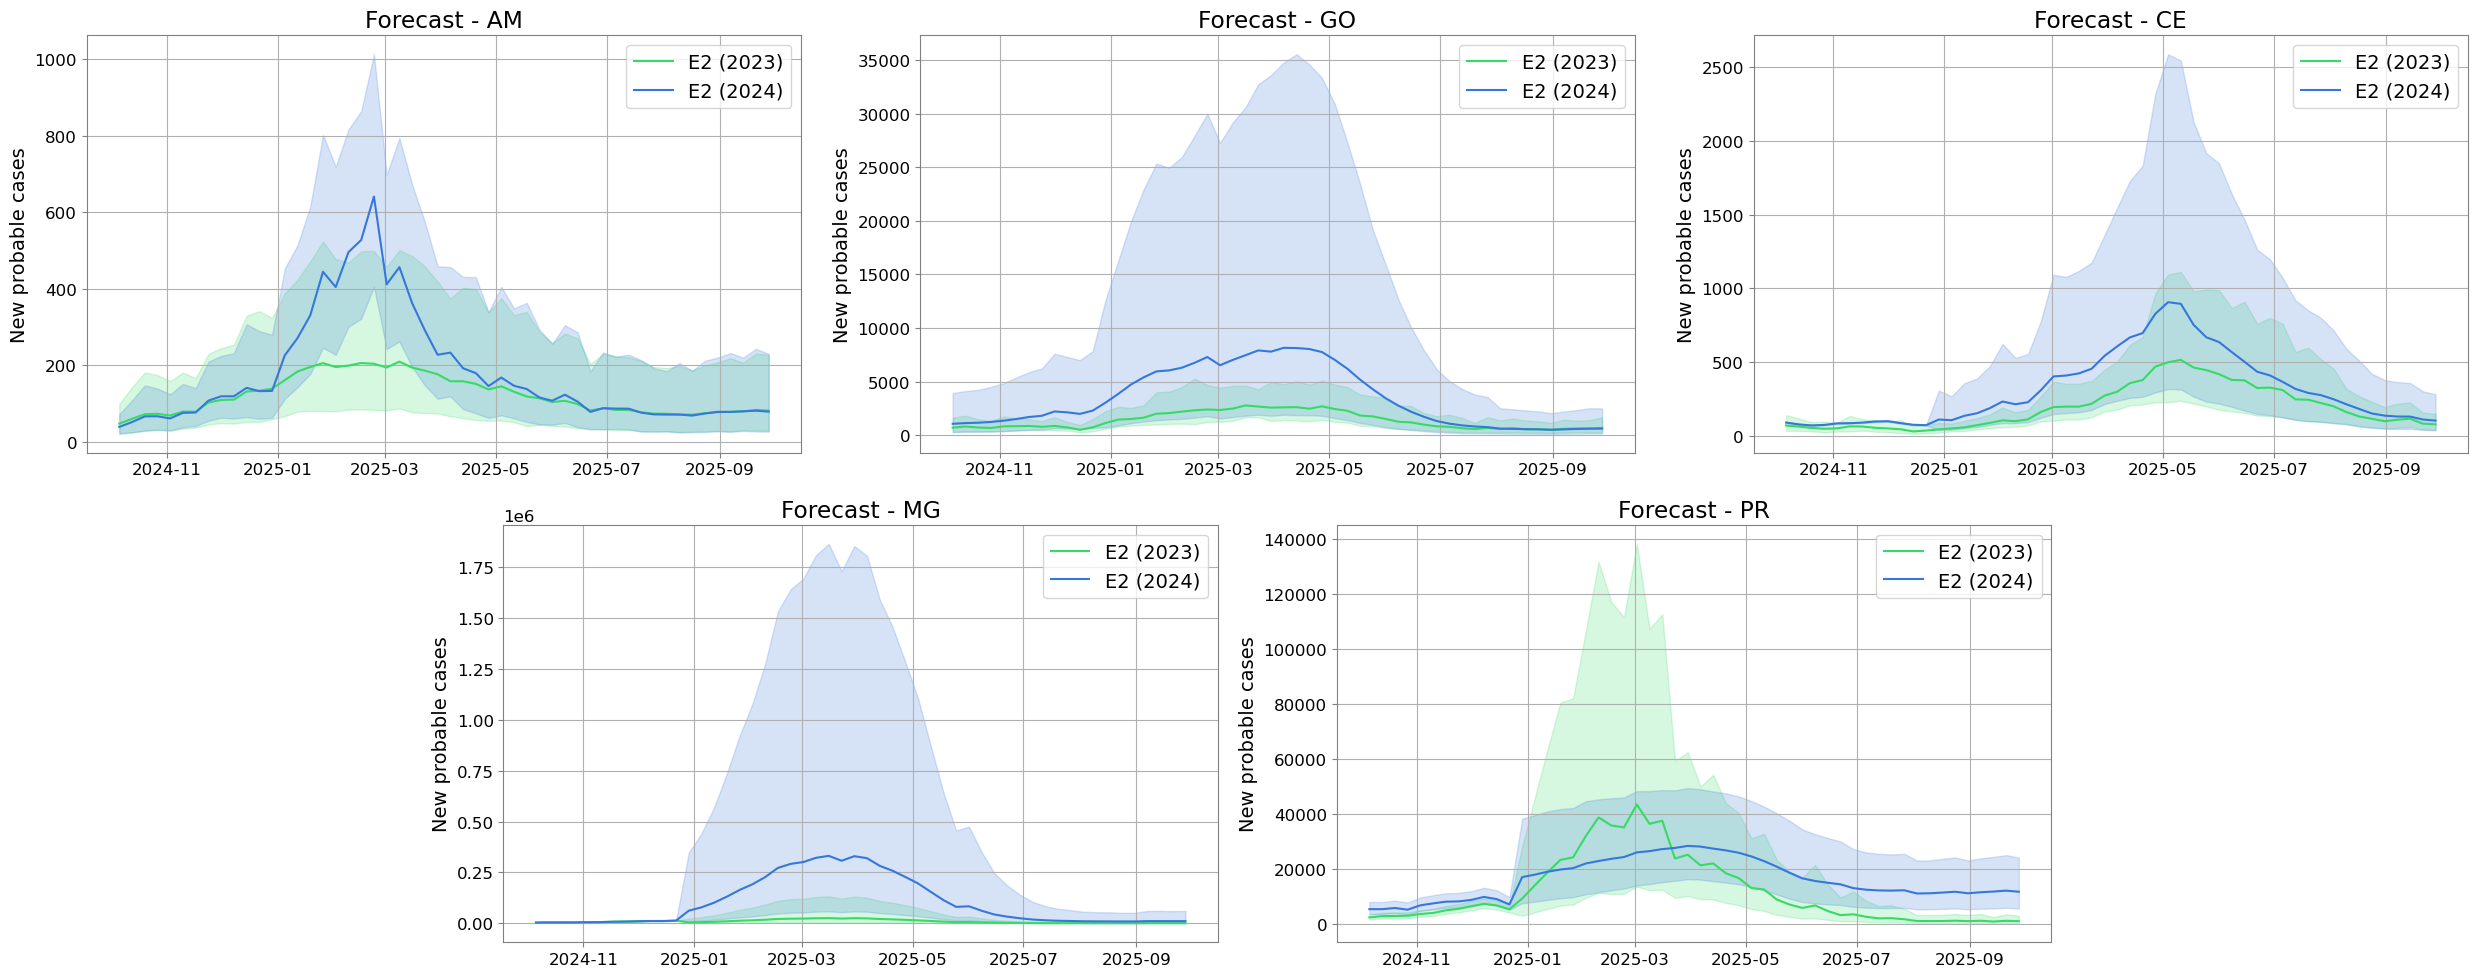

In [12]:
fig = plt.figure(figsize=(25, 10))
gs = gridspec.GridSpec(2, 6, figure=fig)
    
# First row with three boxplots
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
    
# Second row with two boxplots
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

plot_for(ax1, df_for, 'AM')

plot_for(ax2, df_for, 'GO')

plot_for(ax3, df_for, 'CE')

plot_for(ax4, df_for, 'MG')

plot_for(ax5, df_for, 'PR')

#plt.subplots_adjust(wspace= 1)

plt.tight_layout()

plt.savefig(f'../figures/fig_for_sprint.pdf', bbox_inches = 'tight')